## Train YOLOv8 Object Detection on a Custom Dataset



In [ ]:
!nvidia-smi

Tue May 16 15:13:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Install YOLOv8

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.2/585.2 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 10.1 MB/s eta 0:00:00


## Importing Depednencies

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


## Inference Example with Pretrained YOLOv8 Model

In [ ]:
!yolo task=segment mode=predict model=yolov8l-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

100% 88.1M/88.1M [00:00<00:00, 100MB/s]
Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

100% 104k/104k [00:00<00:00, 7.84MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 81.0ms
Speed: 12.0ms preprocess, 81.0ms inference, 17.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


## Train YOLOv8 Model on Custom Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("customobjectdetectionyolov8").project("cargoscan")
dataset = project.version(1).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.103, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to CargoScan-1 in yolov8:: 100%|██████████| 1348/1348 [00:00<00:00, 2064.09it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 100MB/s] 
Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/CargoScan-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int

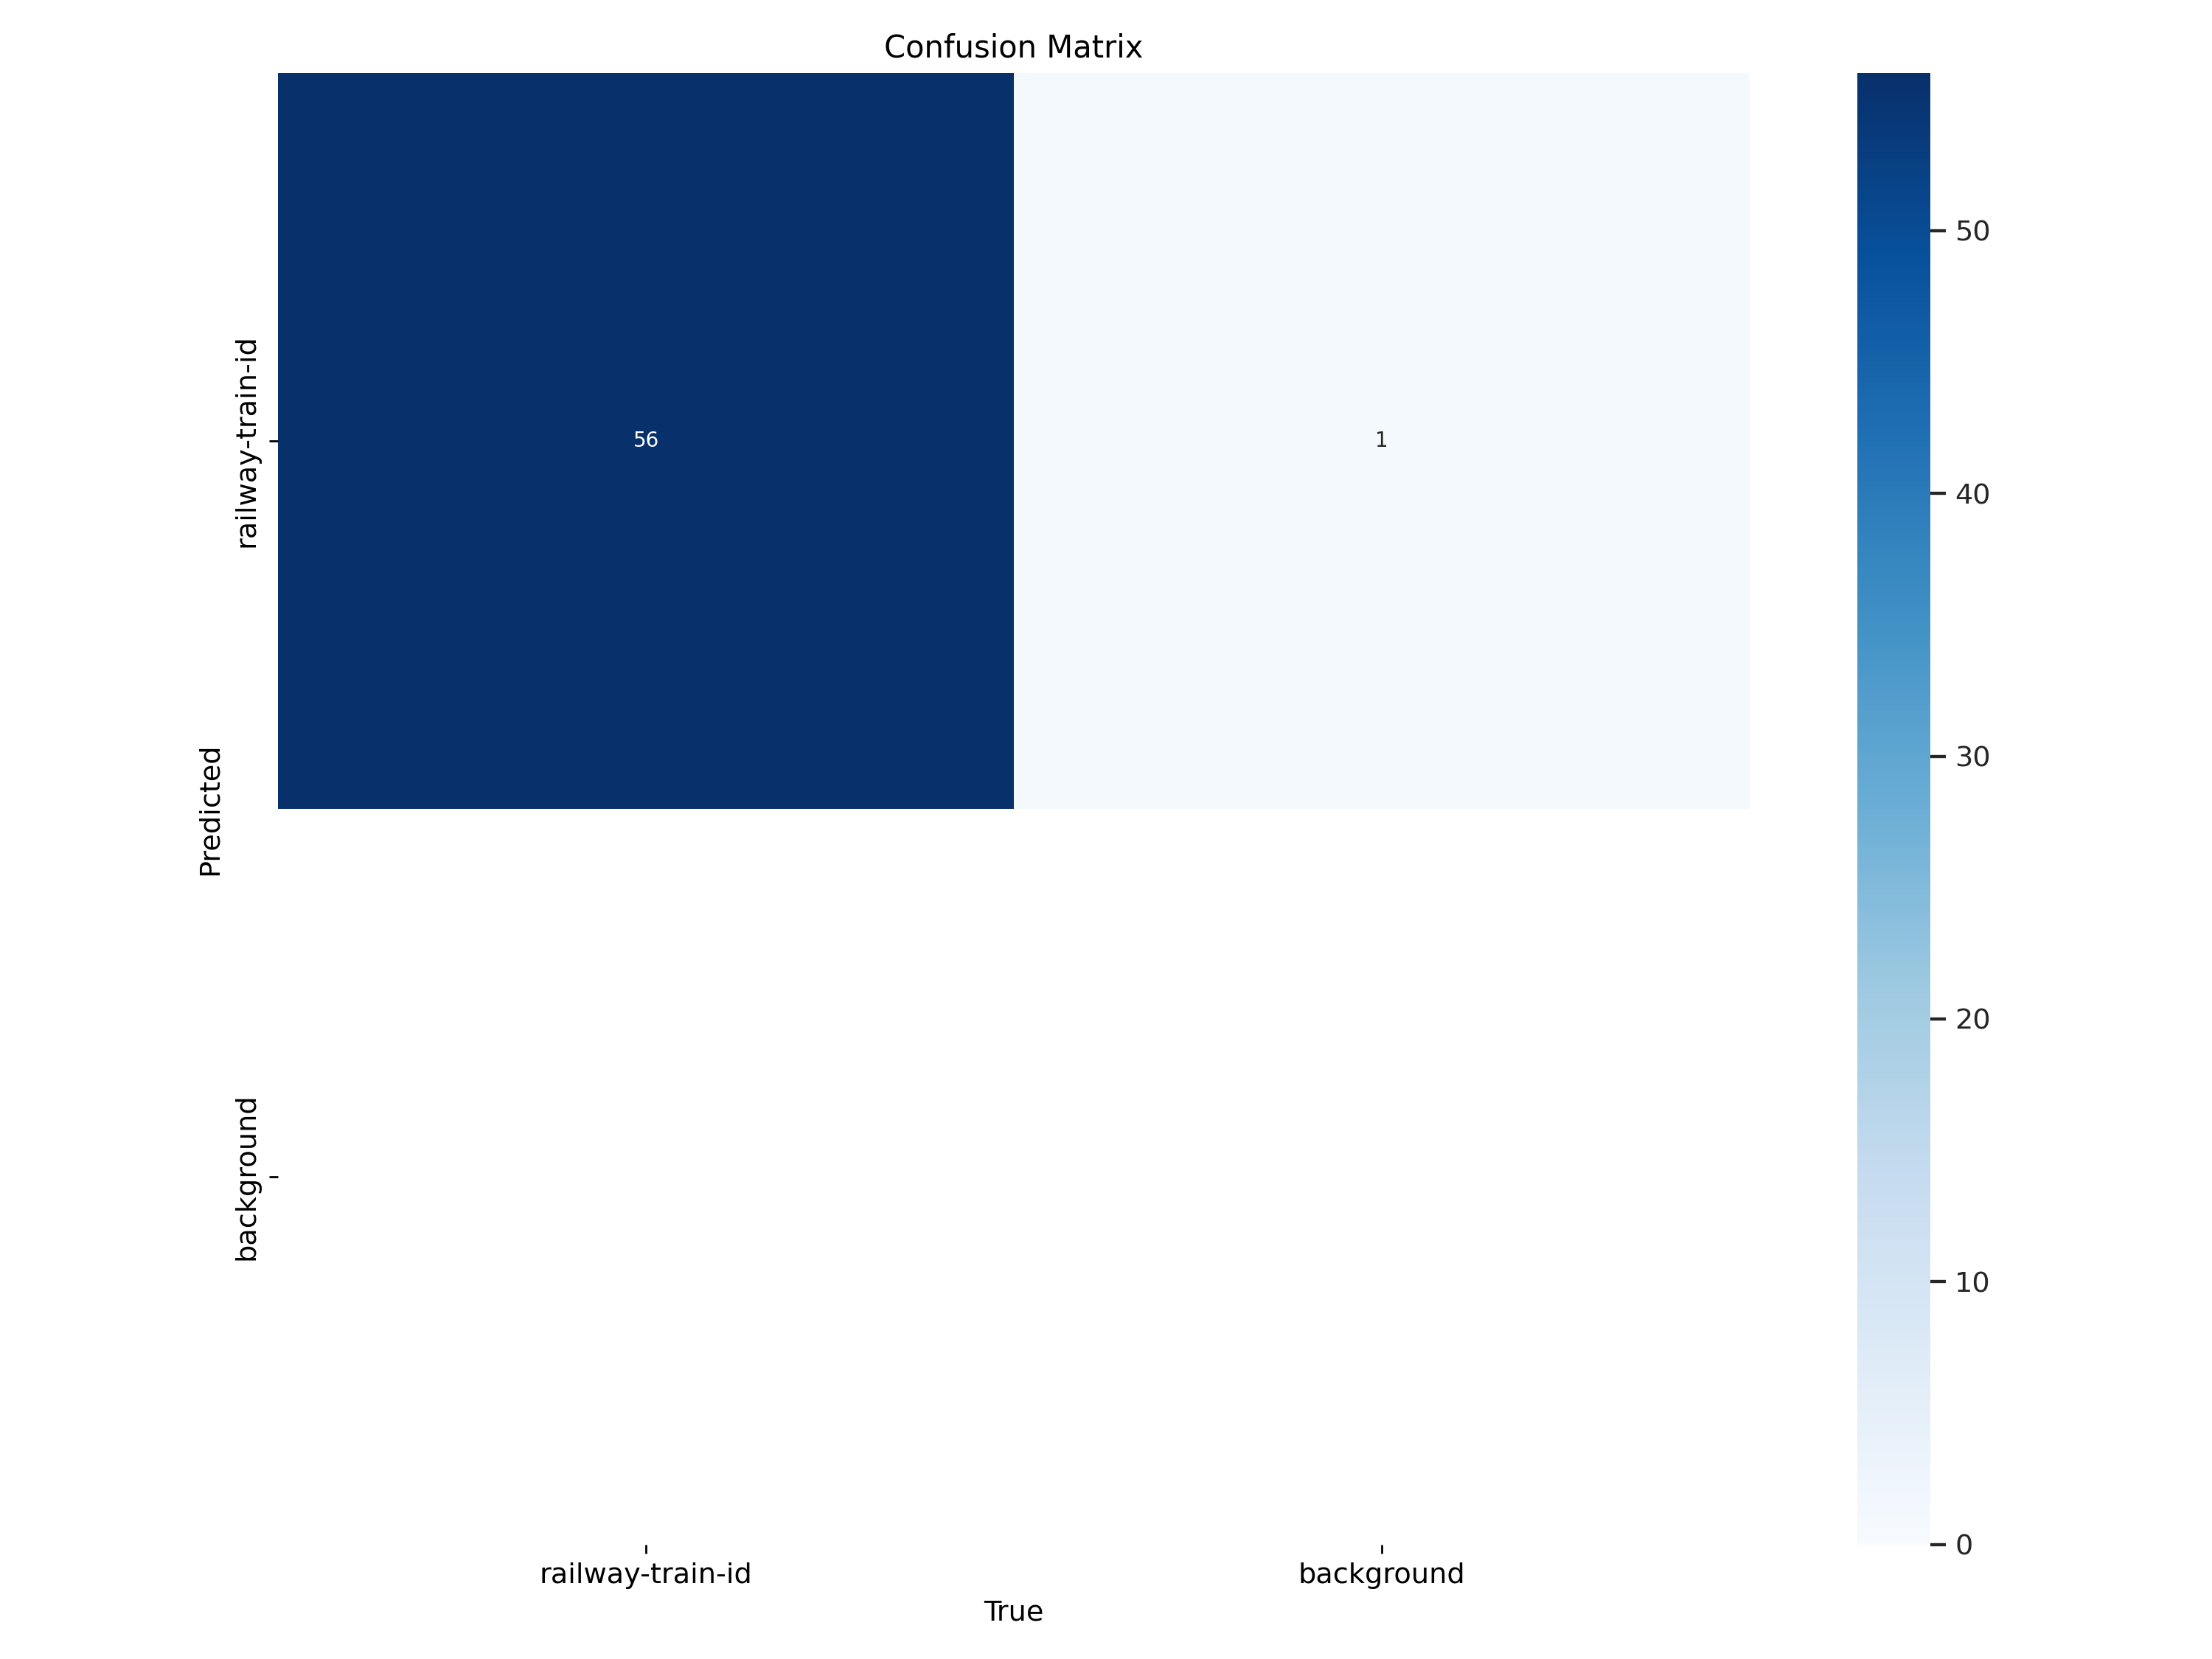

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

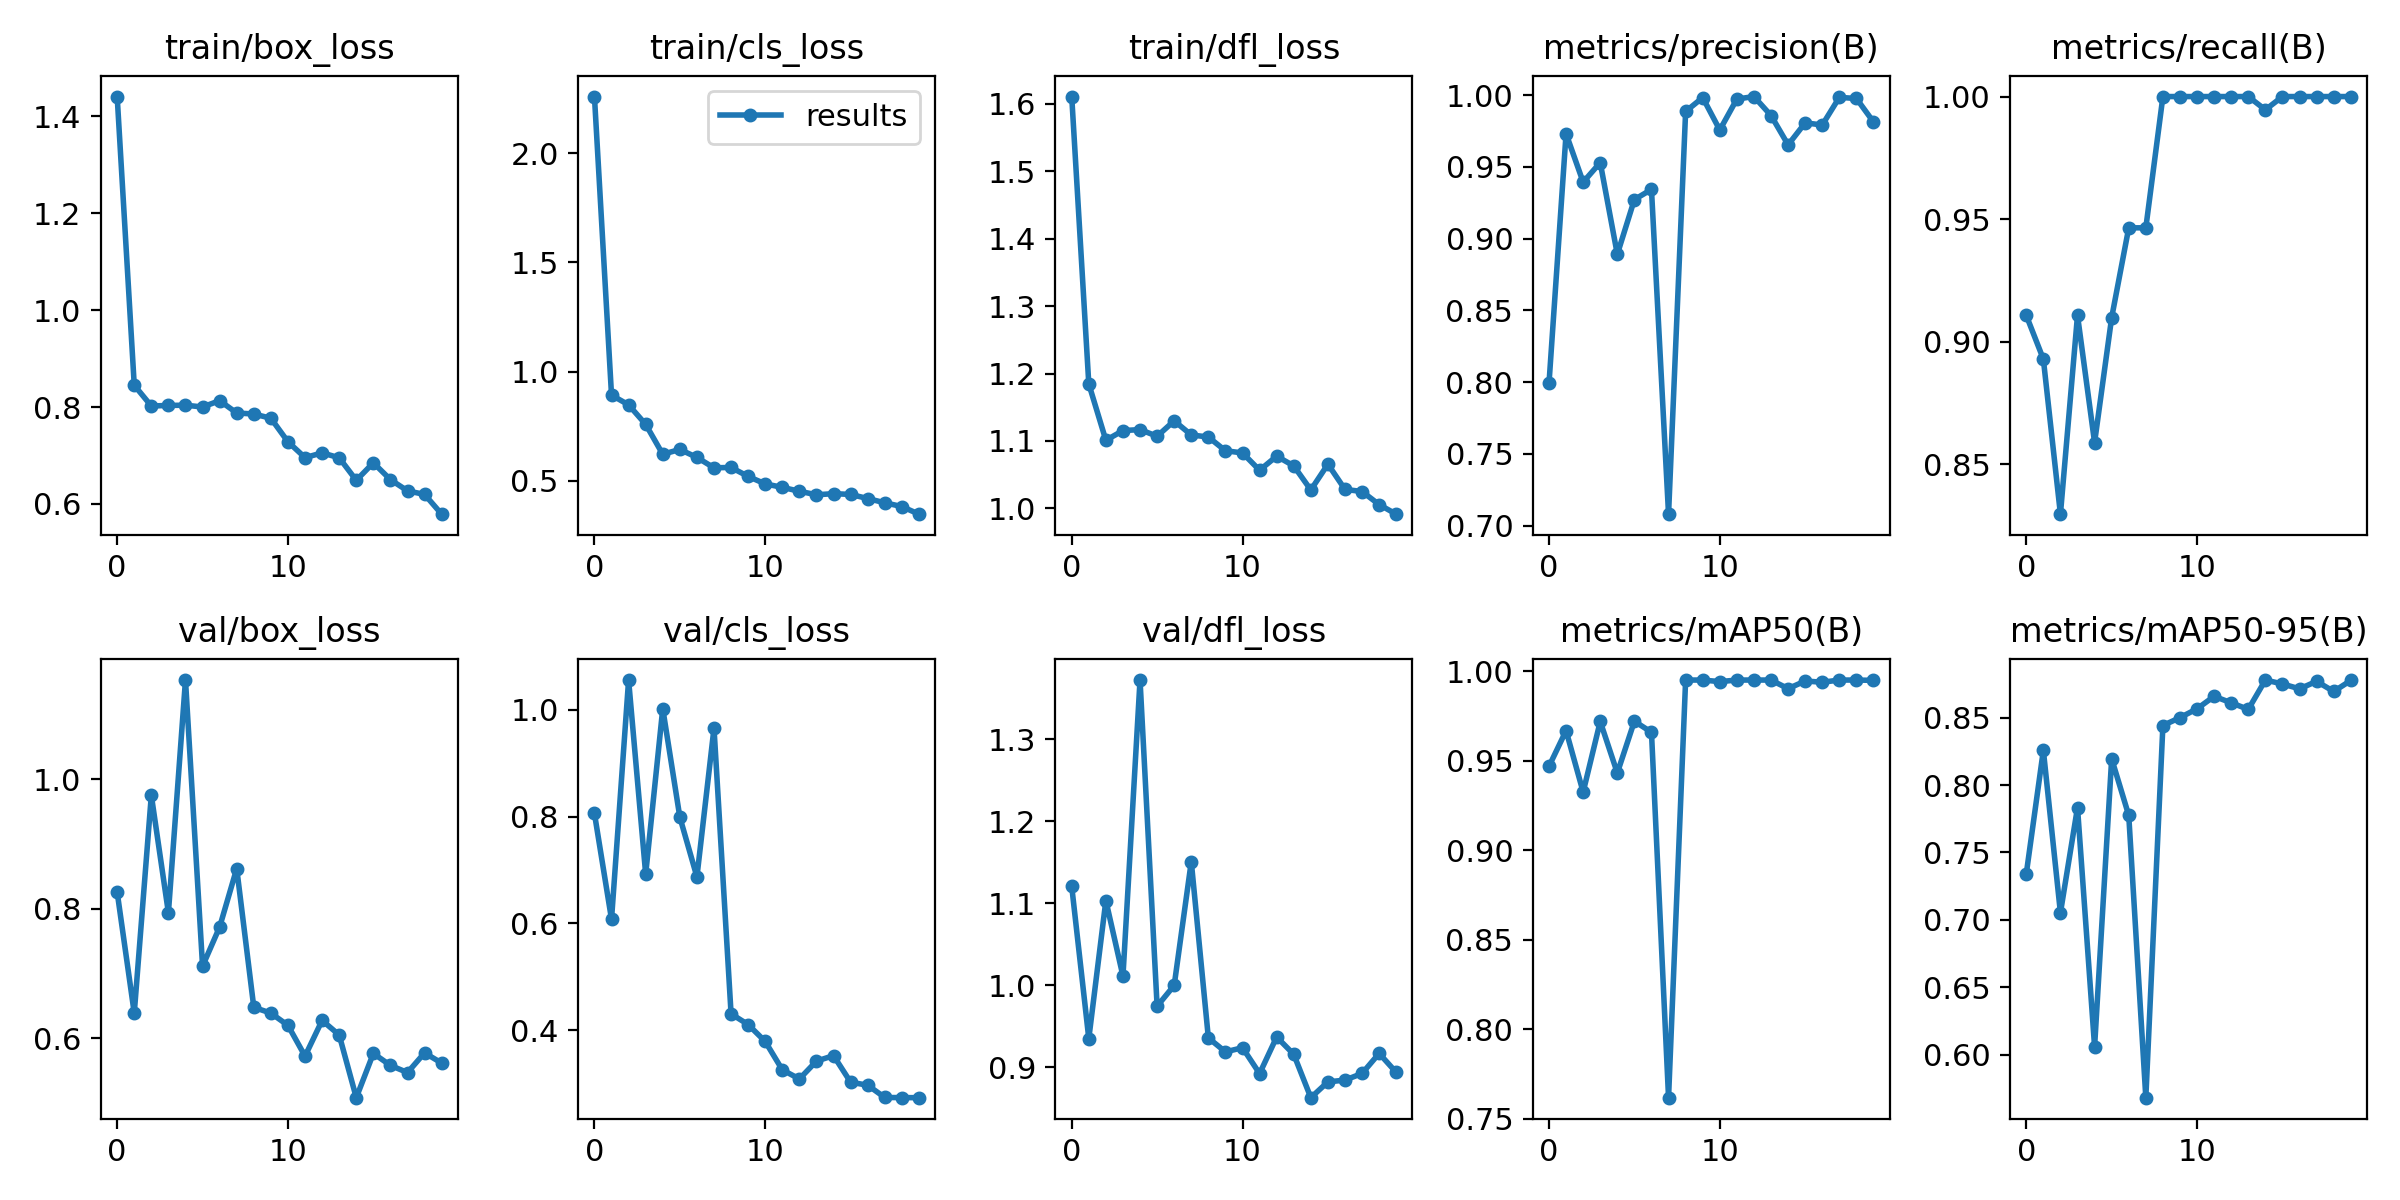

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/CargoScan-1/valid/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100% 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.16s/it]
                   all         56         56      0.981          1      0.995      0.878
Speed: 9.2ms preprocess, 33.4ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/29 /content/CargoScan-1/test/images/second11592_jpg.rf.93e62cf2b4b5a0242b5eb7caae793844.jpg: 640x640 1 railway-train-id, 37.7ms
image 2/29 /content/CargoScan-1/test/images/second11872_jpg.rf.9598e1296481f77f70fdae18ed7b472f.jpg: 640x640 1 railway-train-id, 37.0ms
image 3/29 /content/CargoScan-1/test/images/second11874_jpg.rf.631797972421b9acb2c6c672bf09e651.jpg: 640x640 1 railway-train-id, 36.9ms
image 4/29 /content/CargoScan-1/test/images/second12053_jpg.rf.389b90cf56404c1a4f4dfd71fd34d899.jpg: 640x640 1 railway-train-id, 32.1ms
image 5/29 /content/CargoScan-1/test/images/second12323_jpg.rf.8e0a0cb6d0f07ead1e8f2ae7b32247d5.jpg: 640x640 1 railway-train-id, 32.0ms
image 6/29 /content/CargoScan-1/test/images/second12436_jpg.rf.cba6241c39ae83cdad63e75dcc43b568.jpg: 640x640 1 railway-train-id, 32.0ms
image 7/29 /co

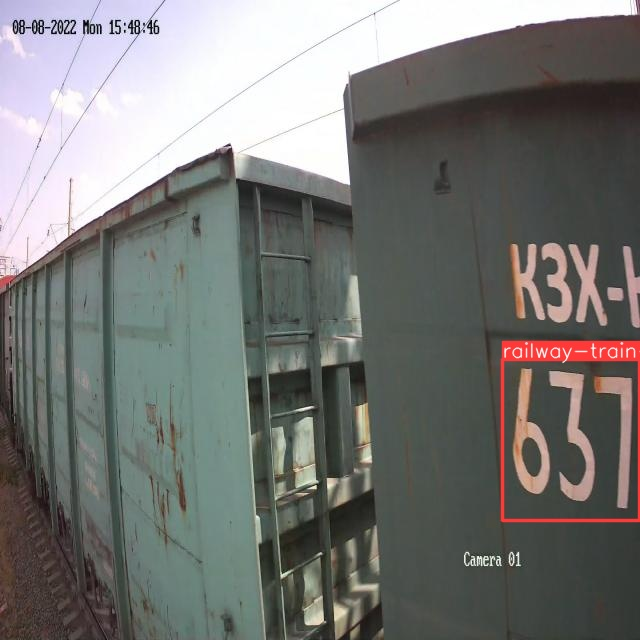

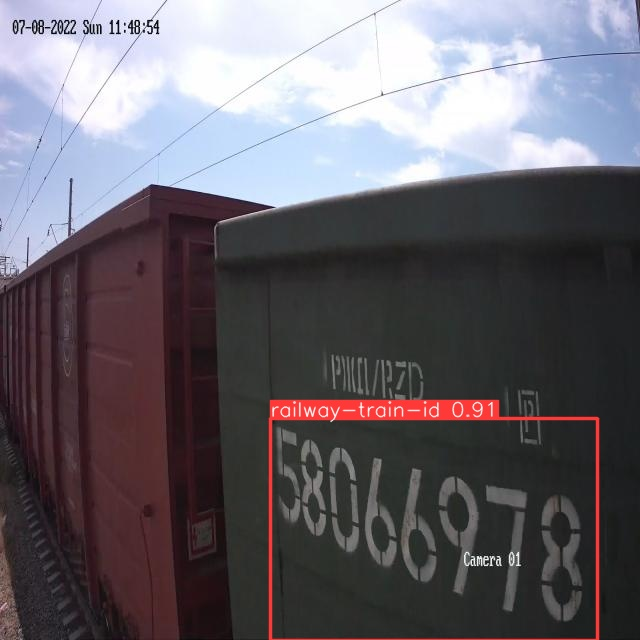

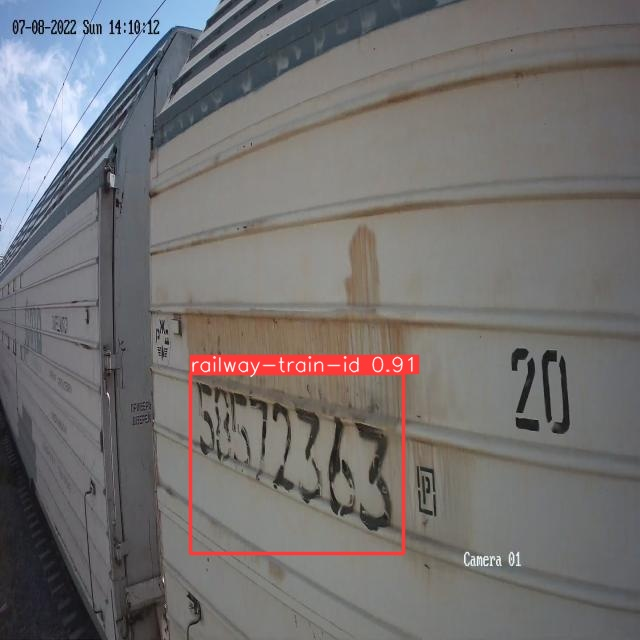

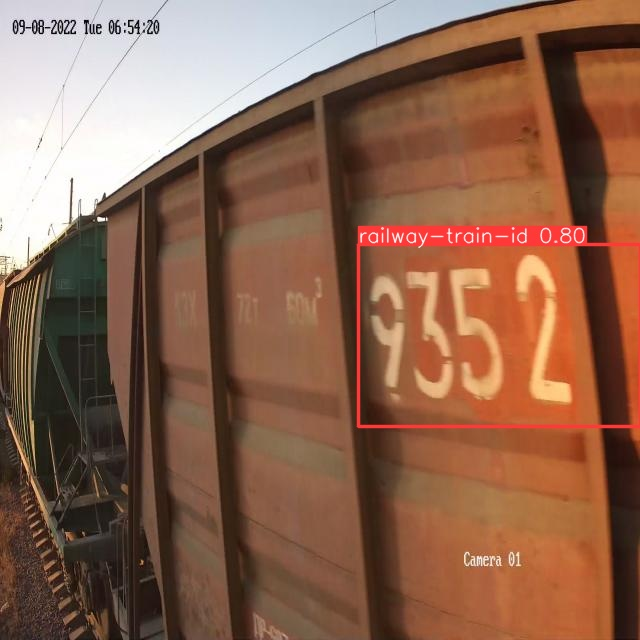

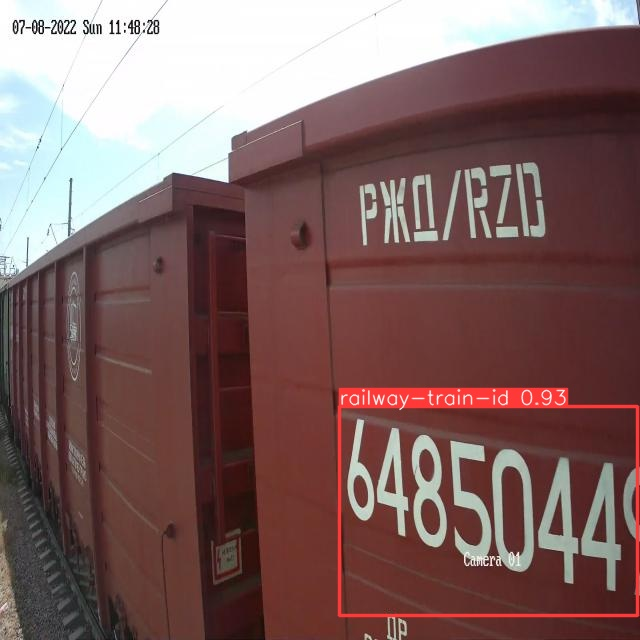

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")